In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
dataset = 'cifar10'
model = 'resnet20_ln'

In [4]:
dir_path  = f'my_{dataset}_{model}_oneshot'

res_df = pd.read_csv(f'{dir_path}/csv/prune_module-woodfisher-based_all_epoch_end-1.csv')

method_s = res_df['method'].unique()
sparsity_s = res_df['target_sparsity'].unique()

res_dict = {'mean': {sparsity : {method : {'prune': None, 'repair': None} for method in method_s} for sparsity in sparsity_s},
            'std': {sparsity : {method : {'prune': None, 'repair': None} for method in method_s} for sparsity in sparsity_s}}

for method in method_s:
    for sparsity in sparsity_s:
        res_dict['mean'][sparsity][method]['prune'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['after_prune'].mean()
        res_dict['mean'][sparsity][method]['repair'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['repair_prune'].mean()
        res_dict['std'][sparsity][method]['prune'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['after_prune'].std()
        res_dict['std'][sparsity][method]['repair'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['repair_prune'].std()
        
for method in method_s:
    res_dict['mean'][method] = {'prune': None, 'repair': None}
    res_dict['std'][method] = {'prune': None, 'repair': None}
    res_dict['mean'][method]['prune'] = [res_dict['mean'][sparsity][method]['prune'] for sparsity in sparsity_s]
    res_dict['mean'][method]['repair'] = [res_dict['mean'][sparsity][method]['repair'] for sparsity in sparsity_s]
    res_dict['std'][method]['prune'] = [res_dict['std'][sparsity][method]['prune'] for sparsity in sparsity_s]
    res_dict['std'][method]['repair'] = [res_dict['std'][sparsity][method]['repair'] for sparsity in sparsity_s]

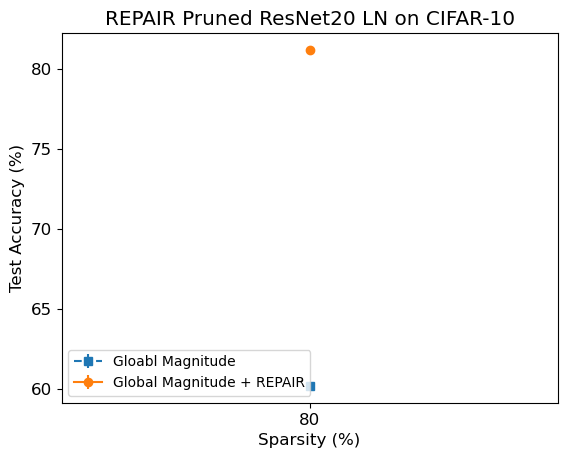

In [10]:
model_name_map = {'resnet20': 'ResNet20', 'resnet20_ln': 'ResNet20 LN', 'vgg16_bn': 'VGG16 BN', 'vgg16_ln': 'VGG16 LN'}
dataset_name_map = {'cifar10': 'CIFAR-10', 'cifar100': 'CIFAR-100'}

plt.rcParams.update({'font.size': 12})

if 'woodfisherblock' in method_s:
    plt.errorbar(sparsity_s, res_dict['mean']['woodfisherblock']['prune'], res_dict['std']['woodfisherblock']['prune'], label='WoodFisher', marker='s', linestyle='--')
    plt.errorbar(sparsity_s, res_dict['mean']['woodfisherblock']['repair'], res_dict['std']['woodfisherblock']['repair'], label='WoodFisher + REPAIR', marker='o')
elif 'diagfisher' in method_s:
    plt.errorbar(sparsity_s, res_dict['mean']['diagfisher']['prune'], res_dict['std']['diagfisher']['prune'], label='DiagFisher', marker='s', linestyle='--')
    plt.errorbar(sparsity_s, res_dict['mean']['diagfisher']['repair'], res_dict['std']['diagfisher']['repair'], label='DiagFisher + REPAIR', marker='o')
if 'globalmagni' in method_s:
    plt.errorbar(sparsity_s, res_dict['mean']['globalmagni']['prune'], res_dict['std']['globalmagni']['prune'], label='Gloabl Magnitude', marker='s', linestyle='--')
    plt.errorbar(sparsity_s, res_dict['mean']['globalmagni']['repair'], res_dict['std']['globalmagni']['repair'], label='Global Magnitude + REPAIR', marker='o')
if 'magni' in method_s:
    plt.errorbar(sparsity_s, res_dict['mean']['magni']['prune'], res_dict['std']['globalmagni']['prune'], label='Layerwise Magnitude', marker='s', linestyle='--')
    plt.errorbar(sparsity_s, res_dict['mean']['magni']['repair'], res_dict['std']['globalmagni']['repair'], label='Layerwise Magnitude + REPAIR', marker='o')

plt.title(f'REPAIR Pruned {model_name_map[model]} on {dataset_name_map[dataset]}')
plt.ylabel('Test Accuracy (%)')
plt.xlabel('Sparsity (%)')
plt.xticks(sparsity_s, labels=[str(int(sparsity*100)) for sparsity in sparsity_s])
plt.legend(loc='lower left', fontsize='small')

imagenet 

In [2]:
path  = 'WoodFisher/exp_neurips/exp_may_25_LOBS_resnet50/csv/imagenet_prune_module-all-gradual_joint-0_samples-400_400_damp-1e-5_one-shot_lobs.csv'

res_df = pd.read_csv(path)

method_s = res_df['method'].unique()
sparsity_s = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

res_dict = {'mean': {sparsity : {method : {'prune': None, 'repair': None} for method in method_s} for sparsity in sparsity_s},
            'std': {sparsity : {method : {'prune': None, 'repair': None} for method in method_s} for sparsity in sparsity_s}}

for method in method_s:
    for sparsity in sparsity_s:
        res_dict['mean'][sparsity][method]['prune'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['after_prune'].mean()
        res_dict['mean'][sparsity][method]['repair'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['repair_prune'].mean()
        res_dict['std'][sparsity][method]['prune'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['after_prune'].std()
        res_dict['std'][sparsity][method]['repair'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['repair_prune'].std()
        
for method in method_s:
    res_dict['mean'][method] = {'prune': None, 'repair': None}
    res_dict['std'][method] = {'prune': None, 'repair': None}
    res_dict['mean'][method]['prune'] = [res_dict['mean'][sparsity][method]['prune'] for sparsity in sparsity_s]
    res_dict['mean'][method]['repair'] = [res_dict['mean'][sparsity][method]['repair'] for sparsity in sparsity_s]
    res_dict['std'][method]['prune'] = [res_dict['std'][sparsity][method]['prune'] for sparsity in sparsity_s]
    res_dict['std'][method]['repair'] = [res_dict['std'][sparsity][method]['repair'] for sparsity in sparsity_s]

In [3]:
path_wood = 'WoodFisher/exp_neurips/exp_may_25_LOBS_resnet50/csv/imagenet_prune_module-all-gradual_joint-0_samples-80_100_damp-1e-5_one-shot_lobs.csv'

res_df = pd.read_csv(path_wood)

method_s = res_df['method'].unique()
sparsity_s = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

res_dict_wood = {'mean': {sparsity : {method : {'prune': None, 'repair': None} for method in method_s} for sparsity in sparsity_s},
            'std': {sparsity : {method : {'prune': None, 'repair': None} for method in method_s} for sparsity in sparsity_s}}

for method in method_s:
    for sparsity in sparsity_s:
        res_dict_wood['mean'][sparsity][method]['prune'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['after_prune'].mean()
        res_dict_wood['mean'][sparsity][method]['repair'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['repair_prune'].mean()
        res_dict_wood['std'][sparsity][method]['prune'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['after_prune'].std()
        res_dict_wood['std'][sparsity][method]['repair'] = res_df[(res_df['method'] == method) & (res_df['target_sparsity'] == sparsity)]['repair_prune'].std()
        
for method in method_s:
    res_dict_wood['mean'][method] = {'prune': None, 'repair': None}
    res_dict_wood['std'][method] = {'prune': None, 'repair': None}
    res_dict_wood['mean'][method]['prune'] = [res_dict_wood['mean'][sparsity][method]['prune'] for sparsity in sparsity_s]
    res_dict_wood['mean'][method]['repair'] = [res_dict_wood['mean'][sparsity][method]['repair'] for sparsity in sparsity_s]
    res_dict_wood['std'][method]['prune'] = [res_dict_wood['std'][sparsity][method]['prune'] for sparsity in sparsity_s]
    res_dict_wood['std'][method]['repair'] = [res_dict_wood['std'][sparsity][method]['repair'] for sparsity in sparsity_s]

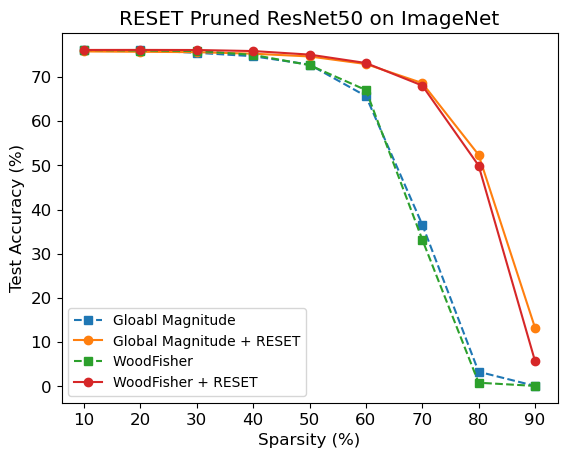

In [5]:
plt.rcParams.update({'font.size': 12})

plt.plot(sparsity_s, res_dict['mean']['globalmagni']['prune'], label='Gloabl Magnitude', marker='s', linestyle='--')
plt.plot(sparsity_s, res_dict['mean']['globalmagni']['repair'], label='Global Magnitude + RESET', marker='o')
plt.plot(sparsity_s, res_dict_wood['mean']['woodfisherblock']['prune'], label='WoodFisher ', marker='s', linestyle='--')
plt.plot(sparsity_s, res_dict_wood['mean']['woodfisherblock']['repair'], label='WoodFisher + RESET', marker='o')

plt.title(f'RESET Pruned ResNet50 on ImageNet')
plt.ylabel('Test Accuracy (%)')
plt.xlabel('Sparsity (%)')
plt.xticks(sparsity_s, labels=[str(int(sparsity*100)) for sparsity in sparsity_s])
plt.legend(loc='lower left', fontsize='small')
plt.savefig('Figures/imagenet_resnet50/global_wood.pdf', bbox_inches='tight')